# Multi-Modal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Name: Thi Thu Nhi, Nguyen

Student number: 132187

## Description 

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as 
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals 

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material 

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. Each file consists one exercise type performed by single user. Data are divided on multiple folders. Note that, in each folder there is one long sequence of single exercise, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br> 
<p> Read raw data from the files. Prepare and divide each data file to shorter sequences using windowing method. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, producing several example sequences from one exercise file for classification purposes. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. Each window will consists 500x3 matrix of acceleration data and 5x192 matrix of depth image data.</p>
<br>  
<p> <b>1.1</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>
<br>
<p> <b>1.2</b> Split the prepared dataset to training and testing datasets so that data of persons 1-7 are used for training and data of persons 8-10 are used for testing. In next tasks, training dataset could be further divided on (multiple) validation data folds to tune the models parameters, when needed.<br>
    
<p> Note: Training set should have 1486 windows and testing set should have 598 windows. In training set, acceleration data will have a window without a pair with depth camera data, that window should be dropped as it doesn't have a pair.<p>
    
    
    
    
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

In [1]:
# Import relevant libraries here
from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd

# Enter data folder location
loc = "./MEx"

In [2]:
def path_to_meta(p):
    meta = dict()
    meta["subject_id"] = p.parent.stem
    meta["exercise_id"] = p.stem.split("_")[-2]
    meta["trial"] = int(p.stem.split("_")[-1])
    meta["sensor_code"] = p.stem.split("_")[0]
    meta["sensor"] = {"act": "acc", "dc": "dc"}[meta["sensor_code"]]
    return meta

# Find, read, and compose the measurements
paths_record = Path(loc).glob("*/*/*.csv")

records = []

for path_record in paths_record:
    df = pd.read_csv(path_record, delimiter=",", header=None)
    meta = path_to_meta(path_record)
    
    if meta["sensor"] == "acc":
        col_names = ["time", "acc_0", "acc_1", "acc_2"]
        df.columns = col_names
    else:
        num_cols = df.shape[1]
        col_names = ["time", ] + [f"dc_{i}" for i in range(num_cols-1)]
        df.columns = col_names

    meta["df"] = df
    
    records.append(meta)

df_records = pd.DataFrame.from_records(records)

print(f"Total records found: {len(df_records)}")
print("Dataframe with all records:")
display(df_records.head())
print("Dataframe with one measurement series:")
display(df_records["df"].iloc[0].head())

Total records found: 160
Dataframe with all records:


,subject_id,exercise_id,trial,sensor_code,sensor,df
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...
1,01,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...
2,01,03,1,act,acc,time acc_0 acc_1 acc_2 0 ...
3,01,04,1,act,acc,time acc_0 acc_1 acc_2 0 ...
4,01,04,2,act,acc,time acc_0 acc_1 acc_2 0 ...


Dataframe with one measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


In [3]:
# Extract 5-second long windows with 2-second shift (3-second overlap)

records_windowed = []

time_window = 5000.
time_offset = 2000.
    
for row_idx, row_data in df_records.iterrows():
    df_tmp = row_data["df"]
    time_start = np.min(df_tmp["time"].to_numpy())
    time_end = np.max(df_tmp["time"].to_numpy())
    
    for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
        t1 = t0 + time_window
        # Handle boundary conditions - skip the measurements from the end shorter than window size
        if t1 > time_end:
            continue
        
        tmp_data = deepcopy(row_data)
        tmp_data["window_idx"] = window_idx
        tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                (df_tmp["time"] < t1)].copy()
        
        records_windowed.append(tmp_data)
        
df_records_windowed = pd.DataFrame.from_records(records_windowed)

print(f"Total windows extracted: {len(df_records_windowed)}")
print("Dataframe with all windowed records:")
display(df_records_windowed.head())
print("Dataframe with one windowed measurement series:")
display(df_records_windowed["df"].iloc[0].head())

Total windows extracted: 4169
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
1,01,01,1,act,acc,time acc_0 acc_1 acc_2 200 ...,1
2,01,01,1,act,acc,time acc_0 acc_1 acc_2 400 ...,2
3,01,01,1,act,acc,time acc_0 acc_1 acc_2 60...,3
4,01,01,1,act,acc,time acc_0 acc_1 acc_2 80...,4


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
30,01,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
139,01,05,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
168,01,06,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
2115,01,02,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,0
2224,01,05,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,0
2253,01,06,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,0


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
845,05,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
945,05,05,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
989,05,06,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
2929,05,02,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,0
3029,05,05,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 dc...,0
3073,05,06,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,0



Multi-dimensional time-series graph of person 1 performing exercises 2, 5, and 6


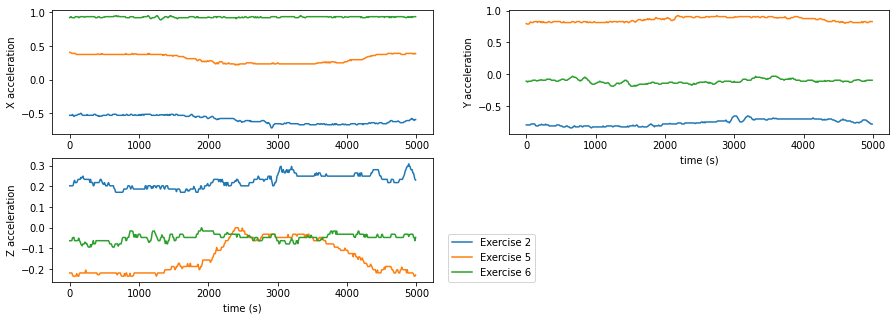

Multi-dimensional time-series graph of person 5 performing exercises 2, 5, and 6


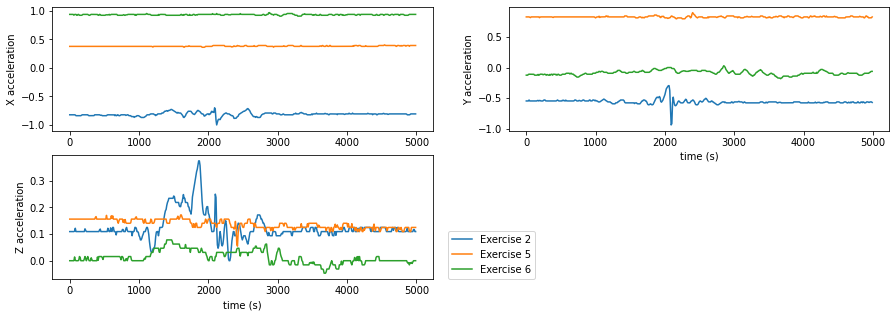

In [4]:
# 1.1. Visualize selected samples for both modalities

### Your code begins here ###
import matplotlib.pyplot as plt
# Create pandas data for Person 1 do exercise 2, 5, 6
person1 = df_records_windowed[(df_records_windowed.subject_id == '01')]
person1_exes256 = person1[(person1.exercise_id == '02') | (person1.exercise_id == '05') | (person1.exercise_id == '06')]
person1_exes256_first = person1_exes256[(person1_exes256.window_idx == 0)]
person1_exes256_first_acc = person1_exes256_first[(person1_exes256_first.sensor == 'acc')]
display(person1_exes256_first_acc)
person1_exes256_first_dc = person1_exes256_first[(person1_exes256_first.sensor == 'dc')]
display(person1_exes256_first_dc)
# Create pandas data for Person 2 do exercise 2, 5, 6
person5 = df_records_windowed[(df_records_windowed.subject_id == '05')]
person5_exes256 = person5[(person5.exercise_id == '02') | (person5.exercise_id == '05') | (person5.exercise_id == '06')]
person5_exes256_first = person5_exes256[(person5_exes256.window_idx == 0)]
person5_exes256_first_acc = person5_exes256_first[(person5_exes256_first.sensor == 'acc')]
display(person5_exes256_first_acc)
person5_exes256_first_dc = person5_exes256_first[(person5_exes256_first.sensor == 'dc')]
display(person5_exes256_first_dc)

################################################################################################
# 5 second acceleration sensor of person 1 and 5 performing exercises 2, 5, and 6.
def plot_multidim(data):
    xticks = [1, 2, 3, 4, 5]
    time = data["df"].iloc[0]['time']
    x2 = data["df"].iloc[0]['acc_0']
    y2 = data["df"].iloc[0]['acc_1']
    z2 = data["df"].iloc[0]['acc_2']

    time5 = data["df"].iloc[1]['time']
    x5 = data["df"].iloc[1]['acc_0']
    y5 = data["df"].iloc[1]['acc_1']
    z5 = data["df"].iloc[1]['acc_2']
    
    time6 = data["df"].iloc[2]['time']
    x6 = data["df"].iloc[2]['acc_0']
    y6 = data["df"].iloc[2]['acc_1']
    z6 = data["df"].iloc[2]['acc_2']
    
    fig = plt.figure(figsize=(15,5))
    fig.add_subplot(2, 2, 1) 
    plt.plot(time, x2, label = 'Exercise 2')
    plt.plot(time5, x5, label = 'Exercise 5')
    plt.plot(time6, x6, label = 'Exercise 6')
    #plt.xticks(time, xticks)
    plt.ylabel('X acceleration')

    fig.add_subplot(2, 2, 2)
    plt.plot(time, y2, label = 'Exercise 2')
    plt.plot(time5, y5, label = 'Exercise 5')
    plt.plot(time6, y6, label = 'Exercise 6')
    plt.xlabel('time (s)')
    #plt.xticks(time, xticks)
    plt.ylabel('Y acceleration')

    fig.add_subplot(2, 2, 3)
    plt.plot(time, z2, label = 'Exercise 2')
    plt.plot(time5, z5, label = 'Exercise 5')
    plt.plot(time6, z6, label = 'Exercise 6')
    plt.xlabel('time (s)')
    #plt.xticks(time, xticks)
    plt.ylabel('Z acceleration')
    
    plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
    plt.show()

print('\nMulti-dimensional time-series graph of person 1 performing exercises 2, 5, and 6')
plot_multidim(person1_exes256_first[person1_exes256_first.sensor == 'acc'])
print('Multi-dimensional time-series graph of person 5 performing exercises 2, 5, and 6')
plot_multidim(person5_exes256_first[person5_exes256_first.sensor == 'acc'])



### Your code ends here ###

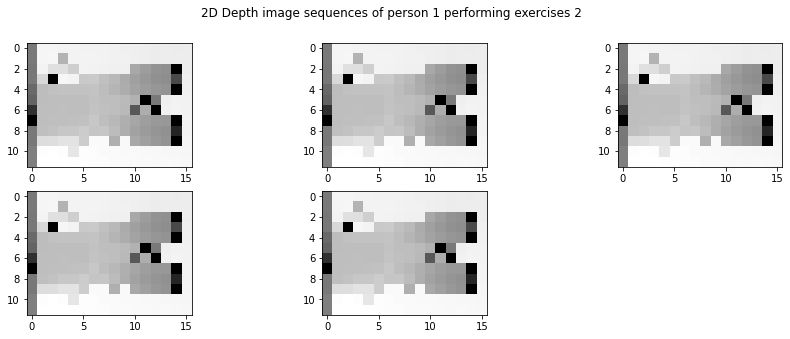

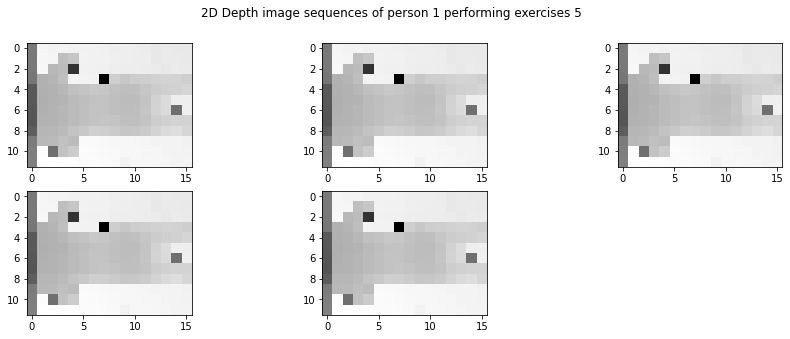

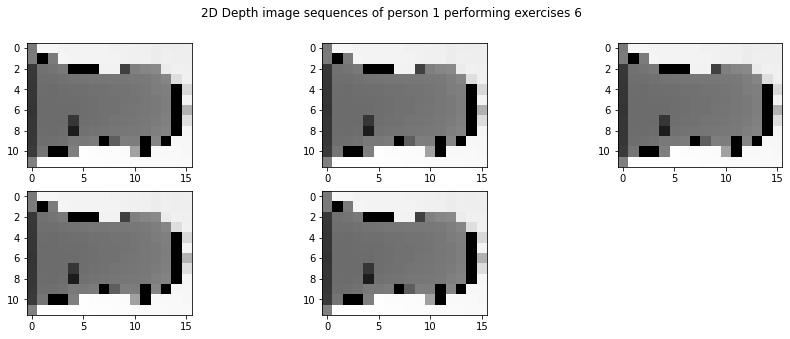

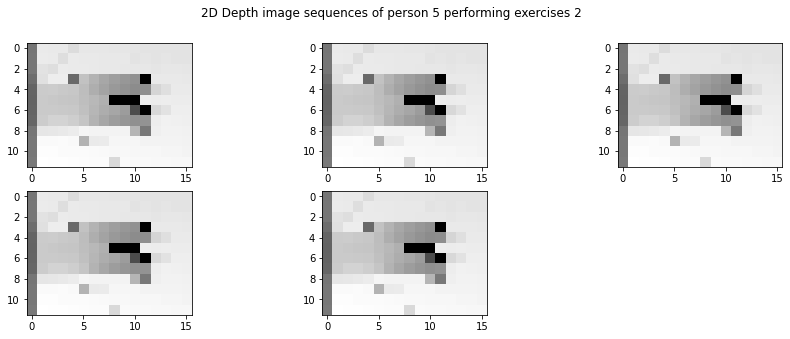

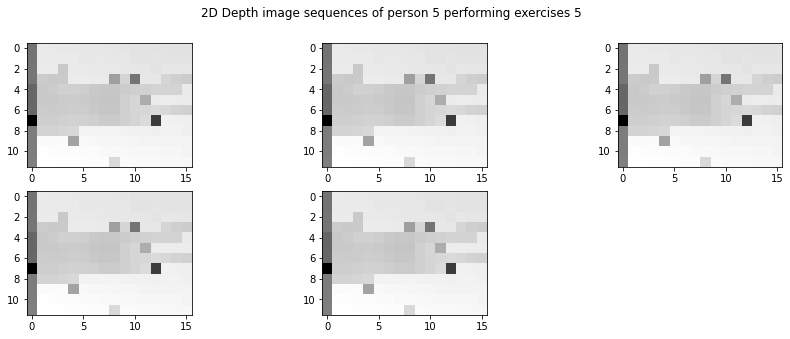

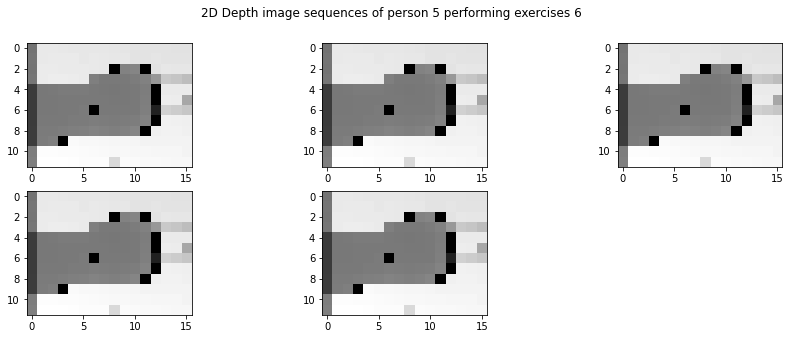

In [5]:
################################################################################################
# Function to plot depth image sequences of person 1 and 5 performing exercises 2, 5, and 6
def plot_img2d(data,person):
    for i in range(len(exes)):
        fig = plt.figure(figsize=(15,5))
        plt.suptitle('2D Depth image sequences of person ' + str(person)  + ' performing exercises ' + str(exes[i]))
        arr = data['df'].iloc[i][data['df'].iloc[i].columns[1:193]].to_numpy()
        arr = np.resize(arr,(5,12,16))
        for i in range(5):
            fig.add_subplot(2, 3, i+1) 
            plt.imshow(arr[0,:,:],cmap=plt.gray())  
        plt.show()
person = [1,5]
exes = [2,5,6]
plot_img2d(person1_exes256_first_dc,person[0])
plot_img2d(person5_exes256_first_dc,person[1])

**1.1** </p>
**Based on 5 second acceleration sensor graph, we see a clear difference between the 3 exercises. And we can see that the X, Y acceleration of person 1 and person 5 when performing exercises 2, 5, and 6, respectively, are the same. But there is a difference in Z acceleration of 2 people when performing the same exercise.** </p>
**Based on the sequence of 5 depth images, even though you can't see the details of the exercises the person is doing, you can see the differences between the exercises and the similarity of the same exercise when performed by two different people.**

In [6]:
# 1.2. Split samples based on subject ID into training and testing datasets for futher experiments

### Your code begins here ###
# Divided data to acc data and dc data
df_acc = df_records_windowed[df_records_windowed.sensor == 'acc']
df_dc = df_records_windowed[df_records_windowed.sensor == 'dc']

#Split the prepared dataset to training and testing datasets 
# so that data of persons 1-7 are used for training 
train_ids = ['01','02','03', '04', '05', '06', '07']
mask_train = df_records_windowed.subject_id.isin(train_ids)
df_train_acc = df_acc[df_acc.subject_id.isin(train_ids)]
df_train_dc = df_dc[df_dc.subject_id.isin(train_ids)]
# and data of persons 8-10 are used for testing.
test_ids = ['08','09','10']
df_test_acc = df_acc[df_acc.subject_id.isin(test_ids)]
df_test_dc = df_dc[df_dc.subject_id.isin(test_ids)]

# Find window index doesn't have a pair
def find_diff_index(df1,df2):
    a = df1['window_idx'].to_list()
    b = df2['window_idx'].to_list()
    for index, (first, second) in enumerate(zip(a, b)):
        if first != second:
            break
    return index
index = find_diff_index(df_train_acc,df_train_dc)

# Drop window as it doesn't have a pair
df_train_acc = df_train_acc.drop(index)

# Create y train, y test numpy
y_train  = df_train_acc['exercise_id'].to_numpy()
y_test  = df_test_acc['exercise_id'].to_numpy()

# Calculate the indicator statistics of training and testing datasets
print('Number of examples of acc train data, test data:', df_train_acc.shape[0],'and',df_test_acc.shape[0])
print("\nTrain dataframe of all windowed records with acceleration sensor:")
display(df_train_acc.head())

print('\n\nNumber of examples of dc train data, test data:', df_train_dc.shape[0],'and',df_test_dc.shape[0])
print("\nTrain dataframe of all windowed records with depth camera:")
display(df_train_dc.head())

print('\nAcc data of first example')
display(df_train_acc['df'].iloc[0].head())
print('Dimensions of each example - train acc data:', df_train_acc['df'].iloc[0].shape,'\n')

print('\nDc data of first example')
display(df_train_dc['df'].iloc[0].head())
print('Dimensions of each example - train dc data:', df_train_dc['df'].iloc[0].shape)
#number of examples, dimensions of each example) and visualize prepared examples.


### Your code ends here ###

Number of examples of acc train data, test data: 1486 and 598

Train dataframe of all windowed records with acceleration sensor:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
1,01,01,1,act,acc,time acc_0 acc_1 acc_2 200 ...,1
2,01,01,1,act,acc,time acc_0 acc_1 acc_2 400 ...,2
3,01,01,1,act,acc,time acc_0 acc_1 acc_2 60...,3
4,01,01,1,act,acc,time acc_0 acc_1 acc_2 80...,4




Number of examples of dc train data, test data: 1486 and 598

Train dataframe of all windowed records with depth camera:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
2085,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,0
2086,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,1
2087,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,2
2088,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,3
2089,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,4



Acc data of first example


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


Dimensions of each example - train acc data: (500, 4) 


Dc data of first example


,time,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,...,dc_182,dc_183,dc_184,dc_185,dc_186,dc_187,dc_188,dc_189,dc_190,dc_191
0,0.0,0.4583,0.9214,0.9221,0.9167,0.9136,0.9136,0.9106,0.9075,0.9052,...,0.9479,0.9460,0.9429,0.6804,0.9360,0.9360,0.9360,0.9329,0.9260,0.9279
1,1000.0,0.4591,0.9214,0.9198,0.9167,0.9136,0.9136,0.9113,0.9075,0.9060,...,0.9489,0.9460,0.9429,0.9167,0.9360,0.9360,0.9352,0.9329,0.9269,0.9279
2,2000.0,0.4583,0.9214,0.9206,0.9167,0.9136,0.9136,0.9106,0.9075,0.9044,...,0.9460,0.9452,0.9429,0.7043,0.9360,0.9360,0.9352,0.9329,0.9260,0.9260
3,3000.0,0.4591,0.9214,0.9206,0.9167,0.9136,0.9136,0.9106,0.9075,0.9060,...,0.9479,0.9452,0.9429,0.6810,0.9360,0.9360,0.9352,0.9329,0.9279,0.9288
4,4000.0,0.4591,0.9214,0.9214,0.9167,0.9144,0.9128,0.9113,0.9075,0.9060,...,0.9460,0.9452,0.9429,0.9165,0.9368,0.6546,0.6284,0.0000,0.9279,0.9260


Dimensions of each example - train dc data: (5, 193)


**1.2** </p>
**After dropping the window without the pair with depth camera data in the accelerometer data. We have 2084 examples in each sensor data. Each sensor data has 1486 examples for training and 598 for testing.**</p>
**If we don't include the 'time' column in the data of each sensor, the accelerator sensor data has (500,3) dimensions and the depth camera sensor data has (5,192) dimensions.**

# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 23-24) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br>
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 2.1-2.2.
    
</div>

Transform acc train set: (1486, 30)
Transform acc test set: (598, 30)

Confusion matrix of KNN - Acc data:


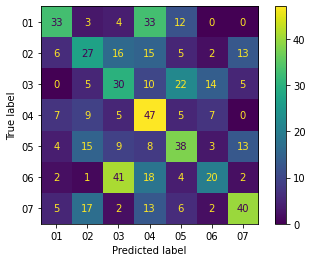

Acc data - F1 score: 0.39267790340373343


In [6]:
# 2.1

### Your code begins here ###

#from sklearn import metrics
from scipy import signal
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Acc data - Standardize the values to zero mean and unit variance before the transformations and downsample data 
scaled_downsample_train_acc = np.zeros((df_train_acc.shape[0], 125,3))
for i in range(df_train_acc.shape[0]):
    scaler = StandardScaler()
    temp = df_train_acc['df'].iloc[i][df_train_acc['df'].iloc[i].columns[1:4]]
    #scaled_df=(temp-temp.mean())/temp.var()
    scaled_df = scaler.fit_transform(temp)
    scaled_downsample_train_acc[i] = signal.resample(scaled_df,125)
    
scaled_downsample_test_acc = np.zeros((df_test_acc.shape[0], 125,3))
for i in range(df_test_acc.shape[0]):
    scaler = StandardScaler()
    temp = df_test_acc['df'].iloc[i][df_test_acc['df'].iloc[i].columns[1:4]]
    #scaled_df=(temp-temp.mean())/temp.var()
    scaled_df = scaler.fit_transform(temp)
    scaled_downsample_test_acc[i] = signal.resample(scaled_df,125)

########################################################################################
# Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) 
pca = PCA(n_components=5)
pca.fit(scaled_downsample_train_acc[:,:,0])
pca.fit(scaled_downsample_train_acc[:,:,1])
pca.fit(scaled_downsample_train_acc[:,:,2])

#xtrain_acc_0_pca = pca.fit_transform(scaled_downsample_train_acc[:,:,0])
#xtrain_acc_1_pca = pca.fit_transform(scaled_downsample_train_acc[:,:,1])
#xtrain_acc_2_pca = pca.fit_transform(scaled_downsample_train_acc[:,:,2])

# And fit LDA with 5-dimensional subspace
lda = LDA(n_components=5)
lda.fit(scaled_downsample_train_acc[:,:,0],y_train)
lda.fit(scaled_downsample_train_acc[:,:,1],y_train)
lda.fit(scaled_downsample_train_acc[:,:,2],y_train)

#xtrain_acc_0_lda = lda.fit_transform(scaled_downsample_train_acc[:,:,0],y_train)
#xtrain_acc_1_lda = lda.fit_transform(scaled_downsample_train_acc[:,:,1],y_train)
#xtrain_acc_2_lda = lda.fit_transform(scaled_downsample_train_acc[:,:,2],y_train)

#  Transform both train and test examples to this low-dimensional feature representation
# Train data - pca
xtrain_acc_0_pca = pca.transform(scaled_downsample_train_acc[:,:,0])
xtrain_acc_1_pca = pca.transform(scaled_downsample_train_acc[:,:,1])
xtrain_acc_2_pca = pca.transform(scaled_downsample_train_acc[:,:,2])
# Train data - lda
xtrain_acc_0_lda = lda.transform(scaled_downsample_train_acc[:,:,0])
xtrain_acc_1_lda = lda.transform(scaled_downsample_train_acc[:,:,1])
xtrain_acc_2_lda = lda.transform(scaled_downsample_train_acc[:,:,2])

# Train data - Concatenate each sequence to single vector size of 3x(5+5)
a = np.vstack((xtrain_acc_0_pca.T, xtrain_acc_0_lda.T)).T
b = np.vstack((xtrain_acc_1_pca.T, xtrain_acc_1_lda.T)).T
c = np.vstack((xtrain_acc_2_pca.T, xtrain_acc_2_lda.T)).T
transform_train_acc = np.concatenate((a, b, c),axis=1)
#transform_train_acc = np.resize(transform_train_acc, (df_train_acc.shape[0],3,10))
print('Transform acc train set:',transform_train_acc.shape)

# Test data - pca
xtest_acc_0_pca = pca.transform(scaled_downsample_test_acc[:,:,0])
xtest_acc_1_pca = pca.transform(scaled_downsample_test_acc[:,:,1])
xtest_acc_2_pca = pca.transform(scaled_downsample_test_acc[:,:,2])
# Test data - lda
xtest_acc_0_lda = lda.transform(scaled_downsample_test_acc[:,:,0])
xtest_acc_1_lda = lda.transform(scaled_downsample_test_acc[:,:,1])
xtest_acc_2_lda = lda.transform(scaled_downsample_test_acc[:,:,2])

# Test data - Concatenate each sequence to single vector size of 3x(5+5)
a = np.vstack((xtest_acc_0_pca.T, xtest_acc_0_lda.T)).T
b = np.vstack((xtest_acc_1_pca.T, xtest_acc_1_lda.T)).T
c = np.vstack((xtest_acc_2_pca.T, xtest_acc_2_lda.T)).T
transform_test_acc = np.concatenate((a, b, c),axis=1)
#transform_test_acc = np.resize(transform_test_acc, (df_test_acc.shape[0],3,10))
print('Transform acc test set:',transform_test_acc.shape)

########################################################################################
# Using NN 
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(transform_train_acc, y_train)
# Evaluate the performance on testset
y_pred = kn.predict(transform_test_acc)

# Show confusion matrix and F1 scores of the results.
print('\nConfusion matrix of KNN - Acc data:')
cm = confusion_matrix(y_test, y_pred, labels=kn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kn.classes_)
disp.plot()
plt.show()
print('Acc data - F1 score:',f1_score(y_test, y_pred, average="macro"))

### Your code ends here ###

**2.1**</p>
**I use the NN method to classify the combined acc data.**</p>
**F1 score of acc data is only 0.39. NN method classifies exercises 4 well and its misclassification is scattered across other exercises.**</p>

Transform dc train set: (1486, 50)
Transform dc test set: (598, 50)

Confusion matrix of KNN - Dc data


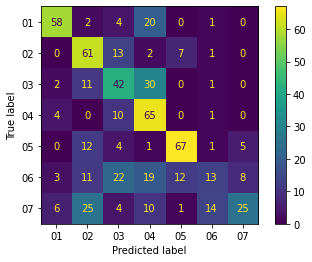

Dc data - F1 score: 0.5333406260317488


In [7]:
# 2.2

### Your code begins here ###

# Dc data - Standardize the values to zero mean and unit variance before the transformations
scaled_train_dc = np.zeros((df_train_dc.shape[0],5,192))
for i in range(df_train_dc.shape[0]):
    temp = df_train_dc['df'].iloc[i][df_train_dc['df'].iloc[i].columns[1:193]]
    #scaled_train_dc[i] =(temp-temp.mean())/temp.var()
    scaler = StandardScaler()
    scaled_train_dc[i] = scaler.fit_transform(temp)
    #scaled_train_dc[i] = temp
    
scaled_test_dc = np.zeros((df_test_dc.shape[0],5,192))
for i in range(df_test_dc.shape[0]):
    temp = df_test_dc['df'].iloc[i][df_test_dc['df'].iloc[i].columns[1:193]]
    #scaled_test_dc[i]=(temp-temp.mean())/temp.var()
    scaler = StandardScaler()
    scaled_test_dc[i] = scaler.fit_transform(temp)
    #scaled_test_dc[i]=temp
    
#y_train_dc  = df_train_dc['exercise_id'].to_numpy()
#y_test_dc  = df_test_dc['exercise_id'].to_numpy()

#scaled_test_dc = (scaled_test_dc - scaled_test_dc.mean()) / scaled_test_dc.var()
#scaled_train_dc = (scaled_train_dc - scaled_train_dc.mean()) / scaled_train_dc.var()

########################################################################################
# Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) 
pca = PCA(n_components=5)
pca.fit(scaled_train_dc[:,0,:])
pca.fit(scaled_train_dc[:,1,:])
pca.fit(scaled_train_dc[:,2,:])
pca.fit(scaled_train_dc[:,3,:])
pca.fit(scaled_train_dc[:,4,:])

#xtrain_dc_0_pca = pca.fit_transform(scaled_train_dc[:,0,:])
#xtrain_dc_1_pca = pca.fit_transform(scaled_train_dc[:,1,:])
#xtrain_dc_2_pca = pca.fit_transform(scaled_train_dc[:,2,:])
#xtrain_dc_3_pca = pca.fit_transform(scaled_train_dc[:,3,:])
#xtrain_dc_4_pca = pca.fit_transform(scaled_train_dc[:,4,:])

# And fit LDA with 5-dimensional subspace
lda = LDA(n_components=5)
lda.fit(scaled_train_dc[:,0,:],y_train)
lda.fit(scaled_train_dc[:,1,:],y_train)
lda.fit(scaled_train_dc[:,2,:],y_train)
lda.fit(scaled_train_dc[:,3,:],y_train)
lda.fit(scaled_train_dc[:,4,:],y_train)

#xtrain_dc_0_lda = lda.fit_transform(scaled_train_dc[:,0,:],y_train)
#xtrain_dc_1_lda = lda.fit_transform(scaled_train_dc[:,1,:],y_train)
#xtrain_dc_2_lda = lda.fit_transform(scaled_train_dc[:,2,:],y_train)
#xtrain_dc_3_lda = lda.fit_transform(scaled_train_dc[:,3,:],y_train)
#xtrain_dc_4_lda = lda.fit_transform(scaled_train_dc[:,4,:],y_train)

#  Transform both train and test examples to this low-dimensional feature representation
# Train data - pca
xtrain_dc_0_pca = pca.transform(scaled_train_dc[:,0,:])
xtrain_dc_1_pca = pca.transform(scaled_train_dc[:,1,:])
xtrain_dc_2_pca = pca.transform(scaled_train_dc[:,2,:])
xtrain_dc_3_pca = pca.transform(scaled_train_dc[:,3,:])
xtrain_dc_4_pca = pca.transform(scaled_train_dc[:,4,:])
# Train data - lda
xtrain_dc_0_lda = lda.transform(scaled_train_dc[:,0,:])
xtrain_dc_1_lda = lda.transform(scaled_train_dc[:,1,:])
xtrain_dc_2_lda = lda.transform(scaled_train_dc[:,2,:])
xtrain_dc_3_lda = lda.transform(scaled_train_dc[:,3,:])
xtrain_dc_4_lda = lda.transform(scaled_train_dc[:,4,:])

a = np.vstack((xtrain_dc_0_pca.T, xtrain_dc_0_lda.T)).T
b = np.vstack((xtrain_dc_1_pca.T, xtrain_dc_1_lda.T)).T
c = np.vstack((xtrain_dc_2_pca.T, xtrain_dc_2_lda.T)).T
d = np.vstack((xtrain_dc_3_pca.T, xtrain_dc_3_lda.T)).T
e = np.vstack((xtrain_dc_4_pca.T, xtrain_dc_4_lda.T)).T

# Train data - Concatenate each sequence to single vector size of 5x1x(5+5)
transform_train_dc = np.concatenate((a, b, c, d, e),axis=1)
print('Transform dc train set:',transform_train_dc.shape)
#transform_train_acc = np.resize(combined_data, (df_train_acc.shape[0],3,10))

# Test data - pca
xtest_dc_0_pca = pca.transform(scaled_test_dc[:,0,:])
xtest_dc_1_pca = pca.transform(scaled_test_dc[:,1,:])
xtest_dc_2_pca = pca.transform(scaled_test_dc[:,2,:])
xtest_dc_3_pca = pca.transform(scaled_test_dc[:,3,:])
xtest_dc_4_pca = pca.transform(scaled_test_dc[:,4,:])
# Test data - lda
xtest_dc_0_lda = lda.transform(scaled_test_dc[:,0,:])
xtest_dc_1_lda = lda.transform(scaled_test_dc[:,1,:])
xtest_dc_2_lda = lda.transform(scaled_test_dc[:,2,:])
xtest_dc_3_lda = lda.transform(scaled_test_dc[:,3,:])
xtest_dc_4_lda = lda.transform(scaled_test_dc[:,4,:])

# Test data - Concatenate each sequence to single vector size of 5x1x(5+5)
a = np.vstack((xtest_dc_0_pca.T, xtest_dc_0_lda.T)).T
b = np.vstack((xtest_dc_1_pca.T, xtest_dc_1_lda.T)).T
c = np.vstack((xtest_dc_2_pca.T, xtest_dc_2_lda.T)).T
d = np.vstack((xtest_dc_3_pca.T, xtest_dc_3_lda.T)).T
e = np.vstack((xtest_dc_4_pca.T, xtest_dc_4_lda.T)).T
transform_test_dc = np.concatenate((a, b, c, d, e),axis=1)
print('Transform dc test set:',transform_test_dc.shape)
#transform_test_acc = np.resize(combined_data, (df_test_acc.shape[0],3,10))

########################################################################################
# Using NN 
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(transform_train_dc, y_train)
# Evaluate the performance on testset
y_pred = kn.predict(transform_test_dc)

# Show confusion matrix and F1 scores of the results.
print('\nConfusion matrix of KNN - Dc data')
cm = confusion_matrix(y_test, y_pred, labels=kn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kn.classes_)
disp.plot()
plt.show()
print('Dc data - F1 score:',f1_score(y_test, y_pred, average="macro"))

### Your code ends here ###

**2.2**</p>
**I use the NN method to classify the combined dc data.**</p>
**F1 score of dc data is 0.53 better than acc data. NN method classifies exercises 1, 2, 4, 5 well.**</p>

# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   
<br> 
<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>
<br>  
<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>
<br> 
<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 3.1-3.3.
    
</div>

In [8]:
# 3.1

### Your code begins here ###

# Train acc data - Calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window
pca = PCA(n_components=10)
pca.fit(scaled_downsample_train_acc[:,:,0])
pca.fit(scaled_downsample_train_acc[:,:,1])
pca.fit(scaled_downsample_train_acc[:,:,2])

# Transform PCA on train acc data
xtrain_acc_0 = pca.transform(scaled_downsample_train_acc[:,:,0])
xtrain_acc_1 = pca.transform(scaled_downsample_train_acc[:,:,1])
xtrain_acc_2 = pca.transform(scaled_downsample_train_acc[:,:,2])

# Train acc data - For each window calculate mean and standard deviation of each three acc channels as statistical features, 
# resulting 6-dimensional vector
mean_acc = np.zeros((xtrain_acc_0.shape[0],3))
std_acc = np.zeros((xtrain_acc_0.shape[0],3))

for i in range(xtrain_acc_0.shape[0]):
    mean_acc[i,0] = np.mean(xtrain_acc_0[i,:])
    mean_acc[i,1] = np.mean(xtrain_acc_1[i,:])
    mean_acc[i,2] = np.mean(xtrain_acc_2[i,:])
    
    std_acc[i,0] = np.std(xtrain_acc_0[i,:])
    std_acc[i,1] = np.std(xtrain_acc_1[i,:])
    std_acc[i,2] = np.std(xtrain_acc_2[i,:])

# Train acc data - Combine these to 36-dimensional final feature vector
transform_train_acc = np.concatenate((xtrain_acc_0, xtrain_acc_0, xtrain_acc_0),axis=1)
transform_train_acc = np.concatenate((transform_train_acc, mean_acc, std_acc),axis=1)
print('36-dimensional final feature vector data for each example of train acc data: ', transform_train_acc.shape)

# Fit PCA on test acc data
#pca = PCA(n_components=10)
#pca.fit(scaled_downsample_test_acc[:,:,0])
#pca.fit(scaled_downsample_test_acc[:,:,1])
#pca.fit(scaled_downsample_test_acc[:,:,2])

# Transform PCA on test acc data
xtest_acc_0 = pca.transform(scaled_downsample_test_acc[:,:,0])
xtest_acc_1 = pca.transform(scaled_downsample_test_acc[:,:,1])
xtest_acc_2 = pca.transform(scaled_downsample_test_acc[:,:,2])

# Test acc data - For each window calculate mean and standard deviation of each three acc channels as statistical features, 
# resulting 6-dimensional vector
mean_acc = np.zeros((xtest_acc_0.shape[0],3))
std_acc = np.zeros((xtest_acc_0.shape[0],3))
for i in range(xtest_acc_0.shape[0]):
    mean_acc[i,0] = np.mean(xtest_acc_0[i,:])
    mean_acc[i,1] = np.mean(xtest_acc_1[i,:])
    mean_acc[i,2] = np.mean(xtest_acc_2[i,:])
    
    std_acc[i,0] = np.std(xtest_acc_0[i,:])
    std_acc[i,1] = np.std(xtest_acc_1[i,:])
    std_acc[i,2] = np.std(xtest_acc_2[i,:])

# Test acc data - Combine these to 36-dimensional final feature vector
transform_test_acc = np.concatenate((xtest_acc_0, xtest_acc_0, xtest_acc_0),axis=1)
#transform_train_acc = np.resize(transform_train_acc, (df_train_acc.shape[0],3,10))
transform_test_acc = np.concatenate((transform_test_acc, mean_acc, std_acc),axis=1)
print('36-dimensional final feature vector for each example of test acc data: ', transform_test_acc.shape)

### Your code ends here ###

36-dimensional final feature vector data for each example of train acc data:  (1486, 36)
36-dimensional final feature vector for each example of test acc data:  (598, 36)


In [9]:
# 3.2

### Your code begins here ###

# Train dc data - Calculate PCA for depth camera, but choose now the 10 largest principal components as 10-dim feature vector for each window
pca = PCA(n_components=10)
pca.fit(scaled_train_dc[:,0,:])
pca.fit(scaled_train_dc[:,1,:])
pca.fit(scaled_train_dc[:,2,:])
pca.fit(scaled_train_dc[:,3,:])
pca.fit(scaled_train_dc[:,4,:])

# Transform PCA on train dc data
xtrain_dc_0 = pca.fit_transform(scaled_train_dc[:,0,:])
xtrain_dc_1 = pca.fit_transform(scaled_train_dc[:,1,:])
xtrain_dc_2 = pca.fit_transform(scaled_train_dc[:,2,:])
xtrain_dc_3 = pca.fit_transform(scaled_train_dc[:,3,:])
xtrain_dc_4 = pca.fit_transform(scaled_train_dc[:,4,:])

# Train dc data - Concatenate the image sequence forming 50-dimensional feature vector from each windowed example
transform_train_dc = np.concatenate((xtrain_dc_0, xtrain_dc_1, xtrain_dc_2,xtrain_dc_3,xtrain_dc_4),axis=1)
print('50-dimensional feature vector from each windowed example of train dc data:',transform_train_dc.shape)

# Transform PCA on test acc data
xtest_dc_0 = pca.transform(scaled_test_dc[:,0,:])
xtest_dc_1 = pca.transform(scaled_test_dc[:,1,:])
xtest_dc_2 = pca.transform(scaled_test_dc[:,2,:])
xtest_dc_3 = pca.transform(scaled_test_dc[:,3,:])
xtest_dc_4 = pca.transform(scaled_test_dc[:,4,:])

# Test dc data - Concatenate the image sequence forming 50-dimensional feature vector from each windowed example
transform_test_dc = np.concatenate((xtest_dc_0, xtest_dc_1, xtest_dc_2,xtest_dc_3,xtest_dc_4),axis=1)
print('50-dimensional feature vector from each windowed example of test dc data:',transform_test_dc.shape)

### Your code ends here ###

50-dimensional feature vector from each windowed example of train dc data: (1486, 50)
50-dimensional feature vector from each windowed example of test dc data: (598, 50)


86-dimensional feature vector of train data for each example of train acc+dc data: (1486, 86)
86-dimensional feature vector for each example of test acc+dc data: (598, 86)

 Confusion matrix of SVM:


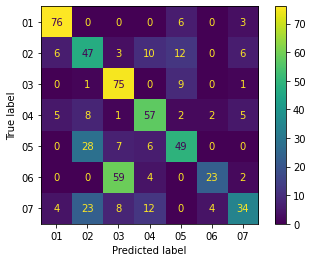

SVM - F1 score: 0.5906357089671409

 Confusion matrix of Gaussian NB:


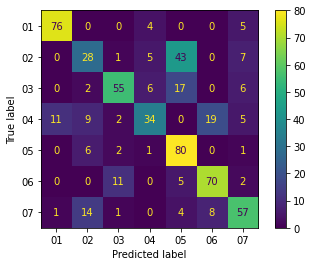

Gaussian NB - F1 score: 0.6563264021953831


In [10]:
# 3.3

### Your code begins here ###
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
#  Form a joint feature presentation of features extracted in 3.1 and 3.2, 
# resulting 86-dimensional feature vector for each example
joint_data_train = np.concatenate((transform_train_acc, transform_train_dc),axis=1)
print('86-dimensional feature vector of train data for each example of train acc+dc data:', joint_data_train.shape)

#min_max_scaler = MinMaxScaler()
#joint_data_scaled_train = min_max_scaler.fit_transform(joint_data_train)


joint_data_test = np.concatenate((transform_test_acc, transform_test_dc),axis=1)
print('86-dimensional feature vector for each example of test acc+dc data:',joint_data_test.shape)
#min_max_scaler = MinMaxScaler()
#joint_data_scaled_test = min_max_scaler.fit_transform(joint_data_test)

# Normalize data between 0-1 using the training dataset.
min_max_scaler = MinMaxScaler()
#joint_data_scaled_train = min_max_scaler.fit_transform(joint_data_train)
min_max_scaler.fit(joint_data_train)

joint_data_scaled_train = min_max_scaler.transform(joint_data_train)
joint_data_scaled_test = min_max_scaler.transform(joint_data_test)

#  Use support vector machine (SVM) with RBF-kernel 
svm = SVC(kernel='rbf')
svm.fit(joint_data_scaled_train, y_train)

# SVM - Confusion matrices and F1 scores
y_pred = svm.predict(joint_data_scaled_test)
print('\n Confusion matrix of SVM:')
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()
print('SVM - F1 score:',f1_score(y_test, y_pred, average='macro'))

# Gaussian naive Bayes classifier
gnb = GaussianNB()
gnb.fit(joint_data_scaled_train, y_train)

# Gaussian NB - Confusion matrices and F1 scores
y_pred = gnb.predict(joint_data_scaled_test)
print('\n Confusion matrix of Gaussian NB:')
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()
print('Gaussian NB - F1 score:',f1_score(y_test, y_pred, average='macro'))

### Your code ends here ###

**3.3** </p>
**Based on F1 score we see that when using joint features Gaussian NB classifier perform better than SVM. SVM classifies exercise 1, 3, 4, 5 well and misclassified exercises 6 the most while Gaussian NB classifies exercise 1, 3, 5, 6, 7 well and misclassified exercises 2 the most .** </p>
**For F1 score: I using averaging method, macro, take the average of each class’s F-1 score cause I want weighs each class equally.** 

# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br> 
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0). 
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$. Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>
<br>
<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes in each subtasks 4.1-4.3.
    
</div>

In [11]:
# 4.1

### Your code begins here ###

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# Normalize data between 0-1 using the training dataset.
# Train acc - test acc data
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(transform_train_acc)
scaled_transform_train_acc = min_max_scaler.transform(transform_train_acc)
scaled_transform_test_acc= min_max_scaler.transform(transform_test_acc)
# Train dc - test dc data
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(transform_train_dc)
scaled_transform_train_dc = min_max_scaler.transform(transform_train_dc)
scaled_transform_test_dc= min_max_scaler.transform(transform_test_dc)

########################################################################################################
# SVM - Train the base classifiers by tuning the model parameters (C parameter and RBF-kernel gamma in SVM)
svm_parameters = {'kernel': ['rbf'], 
              'C':[0.1,1.0,10.0,100.0], 
              'gamma':[0.1,0.25,0.5,0.75,1.0,2.0]}
# Svm - accelerometer
svm_clf_acc = GridSearchCV(SVC(probability=True), svm_parameters, cv = 10)
svm_clf_acc.fit(scaled_transform_train_acc, y_train)
print('Best parameters of SVM for acc data:', svm_clf_acc.best_score_, svm_clf_acc.best_params_)
# Svm - depth images
svm_clf_dc = GridSearchCV(SVC(probability=True), svm_parameters, cv = 10)
svm_clf_dc.fit(scaled_transform_train_dc, y_train)
print('Best parameters of SVM for dc data:', svm_clf_dc.best_score_, svm_clf_dc.best_params_)

# Ada - Train the base classifiers by tuning the model parameters (n_estimators and learning_rate in Adaboost)
ada_parameters = { 'n_estimators':[50,100,500,1000] , 'learning_rate':[0.1,0.25,0.5,0.75,1.0]}
# Ada - accelerometer
ada_clf_acc = GridSearchCV(AdaBoostClassifier(random_state=0), ada_parameters, cv = 10)
ada_clf_acc.fit(scaled_transform_train_acc, y_train)
print('Best parameters of Ada for acc data:', ada_clf_acc.best_score_, ada_clf_acc.best_params_)
# Ada - depth images
ada_clf_dc = GridSearchCV(AdaBoostClassifier(random_state=0), ada_parameters, cv = 10)
ada_clf_dc.fit(scaled_transform_train_dc, y_train)
print('Best parameters of Ada for dc data:', ada_clf_dc.best_score_, ada_clf_dc.best_params_)

#print('Grid SearchCV - Mean test score of SVM classifier for acc data: \n',svm_clf_acc.cv_results_["mean_test_score"])
#print('Grid Search CV - Mean test score of SVM classifier for dc data: \n',svm_clf_dc.cv_results_["mean_test_score"])

#print('Grid SearchCV - Mean test score of SVM classifier for acc data: \n',ada_clf_acc.cv_results_["mean_test_score"])
#print('Grid Search CV - Mean test score of SVM classifier for dc data: \n',ada_clf_dc.cv_results_["mean_test_score"])
########################################################################################################
# SVM - Train the classifiers for each modality on whole training dataset with the best parameters
# Svm - accelerometer
best_svm_clf_acc = SVC(C = 10.0, gamma = 2, kernel ='rbf',probability=True)
best_svm_clf_acc.fit(scaled_transform_train_acc, y_train)
# Svm - depth images
best_svm_clf_dc = SVC(C = 10.0, gamma = 2, kernel ='rbf',probability=True)
best_svm_clf_dc.fit(scaled_transform_train_dc, y_train)

# Ada - Train the classifiers for each modality on whole training dataset with the best parameters
# Ada - accelerometer
best_ada_clf_acc = AdaBoostClassifier(random_state=0, learning_rate=1, n_estimators=1000)
best_ada_clf_acc.fit(scaled_transform_train_acc, y_train)
# Ada - depth images
best_ada_clf_dc = AdaBoostClassifier(random_state=0, learning_rate=0.75, n_estimators=1000)
best_ada_clf_dc.fit(scaled_transform_train_dc, y_train)

### Your code ends here ###

Best parameters of SVM for acc data: 0.6345818973335752 {'C': 10.0, 'gamma': 2.0, 'kernel': 'rbf'}
Best parameters of SVM for dc data: 0.8532922183928896 {'C': 10.0, 'gamma': 2.0, 'kernel': 'rbf'}
Best parameters of Ada for acc data: 0.3606294213676764 {'learning_rate': 1.0, 'n_estimators': 1000}
Best parameters of Ada for dc data: 0.5551695991293306 {'learning_rate': 0.75, 'n_estimators': 1000}


AdaBoostClassifier(learning_rate=0.75, n_estimators=1000, random_state=0)

**4.1** </p>
**Yes, there is a possibility that classifiers will overfit training data using this parameter selection strategy. </p>
I think because the train set is quite small, using 10-fold cross-validation on training dataset will make the classifier overfitting on the training data.** </p>
**When we look at the model best score, we see that SVM performs better than Ada.**

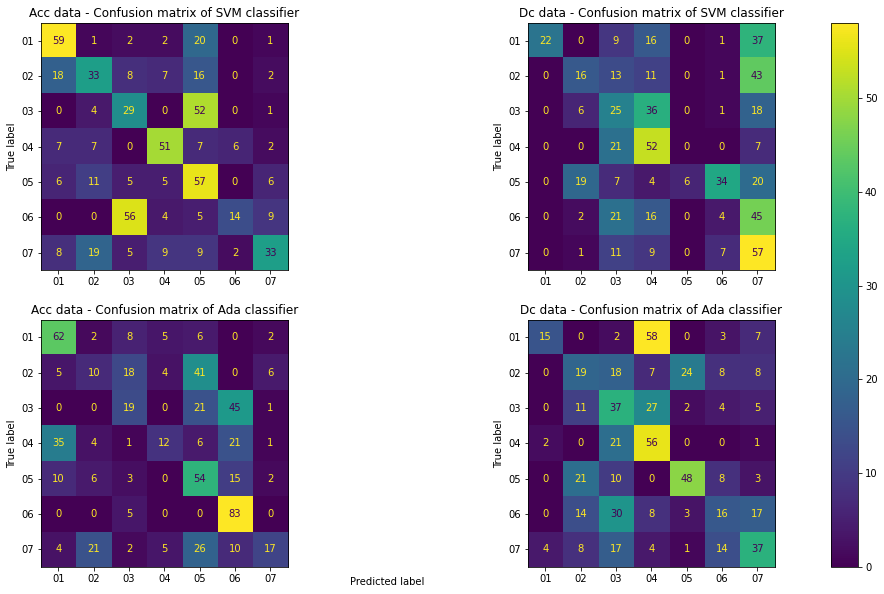

Best SVM classifier on acc data - F1 score: 0.4548308175630743
Best SVM classifier on dc data - F1 score: 0.27625373855229657

Best Ada classifier on acc data - F1 score: 0.3775532595861348
Best Ada classifier on dc data - F1 score: 0.368418862315833


In [12]:
# 4.2

### Your code begins here ###

# Predict probabilistic outputs of each trained classifier for both modalities using the test set.
# SVM - accelerometer
svm_pred_proba_acc = best_svm_clf_acc.predict_proba(scaled_transform_test_acc)
# SVM - depth images
svm_pred_proba_dc = best_svm_clf_dc.predict_proba(scaled_transform_test_dc)

# Ada - accelerometer
ada_pred_proba_acc = best_ada_clf_acc.predict_proba(scaled_transform_test_acc)
# Ada - depth images
ada_pred_proba_dc = best_ada_clf_dc.predict_proba(scaled_transform_test_dc)

##################################################################################################################
# Create confusion matrix for different classifier and sensor
exer_ids = ['01','02','03','04','05','06','07']
cm = confusion_matrix(y_test, best_svm_clf_acc.predict(scaled_transform_test_acc), labels=exer_ids)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=exer_ids)
cm = confusion_matrix(y_test, best_svm_clf_dc.predict(scaled_transform_test_dc), labels=exer_ids)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=exer_ids)
cm = confusion_matrix(y_test, best_ada_clf_acc.predict(scaled_transform_test_acc), labels=exer_ids)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=exer_ids)
cm = confusion_matrix(y_test, best_ada_clf_dc.predict(scaled_transform_test_dc), labels=exer_ids)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=exer_ids)
# Plot confusion matrix 
disp = np.array([[disp1, disp2], [disp3, disp4]])
disp_names = np.array([['Acc data - Confusion matrix of SVM classifier', 'Dc data - Confusion matrix of SVM classifier'], 
                       ['Acc data - Confusion matrix of Ada classifier', 'Dc data - Confusion matrix of Ada classifier']])
f, axes = plt.subplots(2, 2, figsize=(20, 10))
for i in range(disp.shape[0]):
    for j in range(disp.shape[1]):
        disp[i,j].plot(ax=axes[i,j])
        disp[i,j].ax_.set_title(disp_names[i,j])
        disp[i,j].im_.colorbar.remove()
        disp[i,j].ax_.set_xlabel('')
f.text(0.45, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.2)
f.colorbar(disp[i,j].im_, ax=axes)
plt.show()

# Print F1 score
print('Best SVM classifier on acc data - F1 score:',f1_score(y_test, best_svm_clf_acc.predict(scaled_transform_test_acc),average ='macro'))
print('Best SVM classifier on dc data - F1 score:',f1_score(y_test, best_svm_clf_dc.predict(scaled_transform_test_dc),average ='macro'))
print('\nBest Ada classifier on acc data - F1 score:',f1_score(y_test, best_ada_clf_acc.predict(scaled_transform_test_acc),average ='macro'))
print('Best Ada classifier on dc data - F1 score:',f1_score(y_test, best_ada_clf_dc.predict(scaled_transform_test_dc),average ='macro'))

### Your code ends here ###

**SVM performed better on acc data than on dc data, F1 score of SVM on dc data was only 0.27. Ada performs equally on both acc and dc data but the performance is not so good.** </p>
**On acc data, SVM classifies exercises 1, 4, 5 well and misclassified exercises 3, 6 a lot. On dc data, SVM classifies exercises well 4, 7 and its misclassification is scattered across other exercises.**</p>
**On acc data, Ada classifies exercises 1, 6 well and and its misclassification is scattered across other exercises. On dc data, Ada classifies exercise well 4 and misclassifies erxercise 1 the most.**</p>

Confusion Matrix of combine Svm_acc + Svm_depth by fixed classification rules: prod, sum, max, min and F1 Score


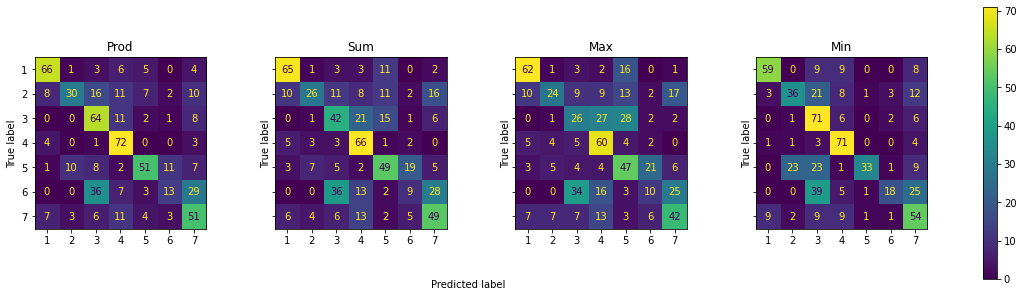


Prod - F1 Score:  0.558604730931713

Sum - F1 Score:  0.4907834515271844

Max - F1 Score:  0.43640282131147357

Min - F1 Score:  0.55874080401421


Confusion Matrix of combine Ada_acc + Ada_depth by fixed classification rules: prod, sum, max, min and F1 Score


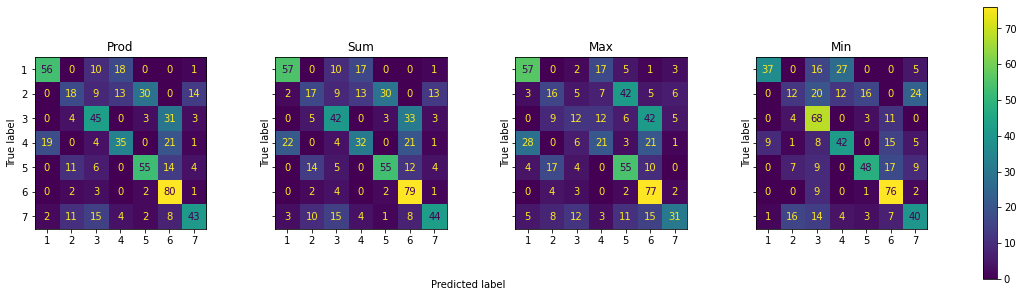


Prod - F1 Score:  0.5388439783831993

Sum - F1 Score:  0.5275388528255707

Max - F1 Score:  0.4168073955253199

Min - F1 Score:  0.5188130865244557


Confusion Matrix of combine Svm_acc + Ada_depth by fixed classification rules: prod, sum, max, min and F1 Score


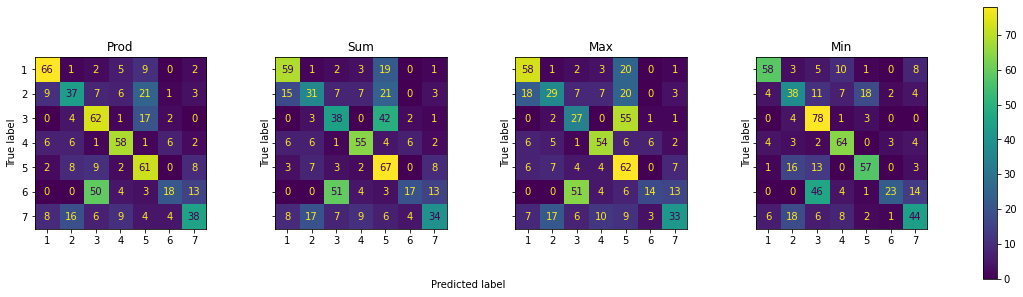


Prod - F1 Score:  0.5545011950626736

Sum - F1 Score:  0.4926764105866283

Max - F1 Score:  0.45320690756256565

Min - F1 Score:  0.5940546627353667


Confusion Matrix of combine Ada_acc + Svm_depth by fixed classification rules: prod, sum, max, min and F1 Score


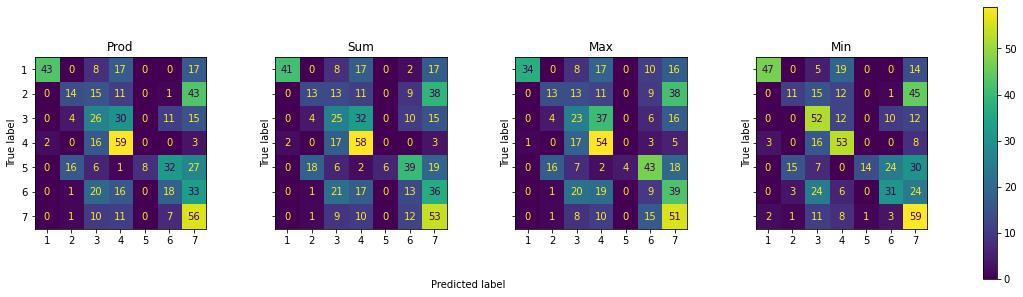


Prod - F1 Score:  0.3559127809374922

Sum - F1 Score:  0.33008139673281384

Max - F1 Score:  0.2959329407721441

Min - F1 Score:  0.4294362809105768




In [13]:
# 4.3

### Your code begins here ###

# Function to plot confusion matrices and print F1 scores. 
def combined(proba1,proba2,y_test,classes):
    # Create posterior scores array
    posterior_scores = np.array((proba1, proba2))
    # Combine the probabilistic outputs of different modalities by fixed classification rules
    y_pred_prod = np.argmax(np.prod(posterior_scores, axis=0),axis=1)+1
    y_pred_sum = np.argmax(np.sum(posterior_scores, axis=0),axis=1)+1
    y_pred_max = np.argmax(np.max(posterior_scores, axis=0),axis=1)+1
    y_pred_min = np.argmax(np.min(posterior_scores, axis=0),axis=1)+1
    # Create confusiofn matrix and confusion matrix plot by fixed classification rules
    cm = confusion_matrix(y_test.astype(int), y_pred_prod, labels = np.array(classes,dtype = int))
    disp_prod = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = np.array(classes,dtype = int))

    cm = confusion_matrix(y_test.astype(int), y_pred_sum, labels = np.array(classes,dtype = int))
    disp_sum = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = np.array(classes,dtype = int))

    cm = confusion_matrix(y_test.astype(int), y_pred_max, labels = np.array(classes,dtype = int))
    disp_max = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = np.array(classes,dtype = int))

    cm = confusion_matrix(y_test.astype(int), y_pred_min, labels = np.array(classes,dtype = int))
    disp_min = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = np.array(classes,dtype = int))

    # Plot confusion matrix
    disp = [disp_prod, disp_sum, disp_max, disp_min]
    disp_names = ['Prod','Sum', 'Max', 'Min']

    f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')
    for i in range(len(disp)):
        disp[i].plot(ax=axes[i])
        disp[i].ax_.set_title(disp_names[i])
        disp[i].im_.colorbar.remove()
        disp[i].ax_.set_xlabel('')

    f.text(0.4, 0.1, 'Predicted label', ha='left')
    plt.subplots_adjust(wspace=0.40, hspace=0.1)
    f.colorbar(disp[i].im_, ax=axes)
    plt.show()

    # Print F1 Score
    prod_test_f1 =  f1_score(y_test.astype(int), y_pred_prod, average='macro')
    print('\nProd - F1 Score: ', prod_test_f1)

    sum_test_f1 = f1_score(y_test.astype(int), y_pred_sum, average='macro')
    print('\nSum - F1 Score: ', sum_test_f1)

    max_test_f1 = f1_score(y_test.astype(int), y_pred_max, average='macro')
    print('\nMax - F1 Score: ', max_test_f1)

    min_test_f1 = f1_score(y_test.astype(int), y_pred_min, average='macro')
    print('\nMin - F1 Score: ', min_test_f1)
    print('\n')

########################################################################################################

print('Confusion Matrix of combine Svm_acc + Svm_depth by fixed classification rules: prod, sum, max, min and F1 Score')
combined(svm_pred_proba_acc, svm_pred_proba_dc, y_test, exer_ids)
  
print('Confusion Matrix of combine Ada_acc + Ada_depth by fixed classification rules: prod, sum, max, min and F1 Score')
combined(ada_pred_proba_acc, ada_pred_proba_dc, y_test, exer_ids)

print('Confusion Matrix of combine Svm_acc + Ada_depth by fixed classification rules: prod, sum, max, min and F1 Score')
combined(svm_pred_proba_acc, ada_pred_proba_dc, y_test, exer_ids)

print('Confusion Matrix of combine Ada_acc + Svm_depth by fixed classification rules: prod, sum, max, min and F1 Score')
combined(ada_pred_proba_acc, svm_pred_proba_dc, y_test, exer_ids)

### Your code ends here ###

**Overall, the combination of SVM_acc and Ada_dc gives the best F1 score. The combination of SVM_acc and SVM_dc gives the F1 score not bad either.**</p>
**F1 score of the combination SVM_acc and Ada_dc by min is the highest which reached 0.59 while the combination SVM_acc and Ada_dc by prod, the combination SVM_acc and SVM_dc by prod, the combination SVM_acc and SVM_dc by min also gives F1 score about 0.56.**

# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br> 
<br> 
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br> 
<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

Acc data from task 4: (2084, 36) And Dc data from task 4: (2084, 50)

Acc data - X train size: (521, 36) and Acc data - X test size: (1563, 36)
Dc data - X train size: (521, 50) and Dc data - X test size: (1563, 50)


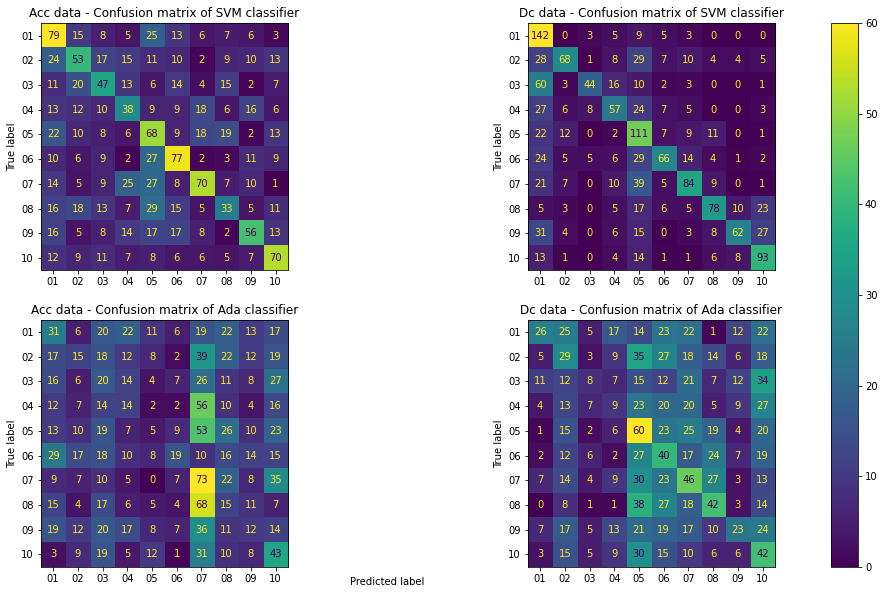

Best SVM classifier on acc data - F1 score: 0.3751314725602337
Best SVM classifier on dc data - F1 score: 0.5134618774700005

Best Ada classifier on acc data - F1 score: 0.1436631008819656
Best Ada classifier on dc data - F1 score: 0.19600524137075953

Confusion Matrix of combine Svm_acc + Svm_depth by fixed classification rules: prod, sum, max, min and F1 Score


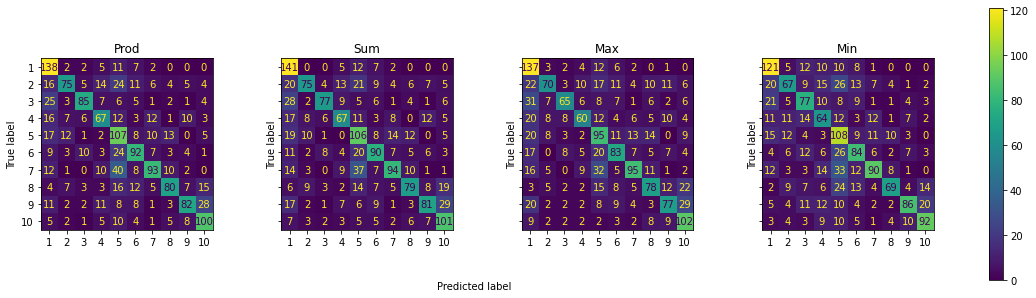


Prod - F1 Score:  0.5893044625300938

Sum - F1 Score:  0.5824803032083172

Max - F1 Score:  0.5492897893895285

Min - F1 Score:  0.5499315054660783




In [14]:
# 5.1

### Your code begins here ###

from sklearn.model_selection import train_test_split
# Acc data - Combine transform data 
person_transform_acc = np.concatenate((transform_train_acc, transform_test_acc))
# Dc data - Combine transform data 
person_transform_dc = np.concatenate((transform_train_dc, transform_test_dc))
print('Acc data from task 4:', person_transform_acc.shape,'And Dc data from task 4:',person_transform_dc.shape)

# Find and drop window index doesn't have a pair
def find_diff_index(df1,df2):
    a = df1['window_idx'].to_list()
    b = df2['window_idx'].to_list()
    for index, (first, second) in enumerate(zip(a, b)):
        if first != second:
            break
    return index
index = find_diff_index(df_acc,df_dc)
df_acc_drop = df_acc.drop(index)

# Create y - person ids
person_ids = ['01','02','03', '04', '05', '06', '07', '08', '09', '10']
person_y  = df_acc_drop['subject_id'].to_numpy()

# Split acc data, dc data to train, test set (0.25-0.75)
xtrain_acc, xtest_acc, ytrain, ytest = train_test_split(person_transform_acc, person_y, test_size=0.75, random_state=0)
print('\nAcc data - X train size:',xtrain_acc.shape, 'and Acc data - X test size:',xtest_acc.shape)

xtrain_dc, xtest_dc = train_test_split(person_transform_dc, test_size=0.75, random_state=0)
print('Dc data - X train size:',xtrain_dc.shape, 'and Dc data - X test size:',xtest_dc.shape)

# Normalize data between 0-1 using the training dataset.
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(xtrain_acc)
scaled_transform_train_acc = min_max_scaler.transform(xtrain_acc)
scaled_transform_test_acc= min_max_scaler.transform(xtest_acc)

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(xtrain_dc)
scaled_transform_train_dc = min_max_scaler.transform(xtrain_dc)
scaled_transform_test_dc= min_max_scaler.transform(xtest_dc)

########################################################################################################################
# SVM - Train the classifiers for each modality on whole training dataset with the best parameters
# Svm - accelerometer
best_svm_clf_acc = SVC(C = 10.0, gamma = 2, kernel ='rbf',probability=True)
best_svm_clf_acc.fit(scaled_transform_train_acc, ytrain)
# Svm - depth images
best_svm_clf_dc = SVC(C = 10.0, gamma = 2, kernel ='rbf',probability=True)
best_svm_clf_dc.fit(scaled_transform_train_dc, ytrain)

# SVM - Predict probabilistic outputs of each trained classifier for both modalities using the test set.
# SVM - accelerometer
svm_pred_proba_acc = best_svm_clf_acc.predict_proba(scaled_transform_test_acc)
# SVM - depth images
svm_pred_proba_dc = best_svm_clf_dc.predict_proba(scaled_transform_test_dc)

# Ada - Train the classifiers for each modality on whole training dataset with the best parameters
# Ada - accelerometer
best_ada_clf_acc = AdaBoostClassifier(random_state=0, learning_rate=1, n_estimators=1000)
best_ada_clf_acc.fit(scaled_transform_train_acc, ytrain)
# Ada - depth images
best_ada_clf_dc = AdaBoostClassifier(random_state=0, learning_rate=0.75, n_estimators=1000)
best_ada_clf_dc.fit(scaled_transform_train_dc, ytrain)

# Ada - Predict probabilistic outputs of each trained classifier for both modalities using the test set.
# Ada - accelerometer
ada_pred_proba_acc = best_ada_clf_acc.predict_proba(scaled_transform_test_acc)
# Ada - depth images
ada_pred_proba_dc = best_ada_clf_dc.predict_proba(scaled_transform_test_dc)

##################################################################################################################
# Create confusion matrix for different classifier and sensor
cm = confusion_matrix(ytest, best_svm_clf_acc.predict(scaled_transform_test_acc), labels=person_ids)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=person_ids)
cm = confusion_matrix(ytest, best_svm_clf_dc.predict(scaled_transform_test_dc), labels=person_ids)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=person_ids)
cm = confusion_matrix(ytest, best_ada_clf_acc.predict(scaled_transform_test_acc), labels=person_ids)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=person_ids)
cm = confusion_matrix(ytest, best_ada_clf_dc.predict(scaled_transform_test_dc), labels=person_ids)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=person_ids)
# Plot confusion matrix 
disp = np.array([[disp1, disp2], [disp3, disp4]])
disp_names = np.array([['Acc data - Confusion matrix of SVM classifier', 'Dc data - Confusion matrix of SVM classifier'], 
                       ['Acc data - Confusion matrix of Ada classifier', 'Dc data - Confusion matrix of Ada classifier']])
f, axes = plt.subplots(2, 2, figsize=(20, 10))
for i in range(disp.shape[0]):
    for j in range(disp.shape[1]):
        disp[i,j].plot(ax=axes[i,j])
        disp[i,j].ax_.set_title(disp_names[i,j])
        disp[i,j].im_.colorbar.remove()
        disp[i,j].ax_.set_xlabel('')
f.text(0.45, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.2)
f.colorbar(disp[i,j].im_, ax=axes)
plt.show()
# Print F1 score
print('Best SVM classifier on acc data - F1 score:',f1_score(ytest, best_svm_clf_acc.predict(scaled_transform_test_acc),average ='macro'))
print('Best SVM classifier on dc data - F1 score:',f1_score(ytest, best_svm_clf_dc.predict(scaled_transform_test_dc),average ='macro'))
print('\nBest Ada classifier on acc data - F1 score:',f1_score(ytest, best_ada_clf_acc.predict(scaled_transform_test_acc),average ='macro'))
print('Best Ada classifier on dc data - F1 score:',f1_score(ytest, best_ada_clf_dc.predict(scaled_transform_test_dc),average ='macro'))

# Svm_acc + Svm_depth
print('\nConfusion Matrix of combine Svm_acc + Svm_depth by fixed classification rules: prod, sum, max, min and F1 Score')
combined(svm_pred_proba_acc, svm_pred_proba_dc, ytest, person_ids)

### Your code ends here ###

**5.1**</p>
**Since task 5 uses the features base on task 4, I combine the processed data in task 3 transform_train_acc (This is acc data of persons 1-7 downsample and standardize then apply PCA = 10), transform_test_acc (This is acc data of persons 8-10 downsample and standardize then apply PCA = 10) to person_transform_acc (data of 10 person but processed). I also do the same for dc data.**</p>
**I split acc data and dc data using random_state = 0 so I only used one ytest for both data.**</p>
**After looking at the results between SVM and Ada on this acc and dc dataset, I found that SVM performed better, so I decided to combine SVM_acc and SVM_dc by fixed classification rules: max, min, prod, and sum. And found the prob gives the best F1 score: 0.59.**</p>

### Find best parameter of GB for task 5.2

In [24]:
# GB - Train the base classifiers by tuning the model parameters 
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
# GB - accelerometer
gb_clf_acc = GridSearchCV(GaussianNB(), params_NB, cv = 10)
gb_clf_acc.fit(scaled_transform_train_acc, ytrain)
print('Best parameters of GB for acc data:', gb_clf_acc.best_score_, gb_clf_acc.best_params_)
# GB - depth images
gb_clf_dc = GridSearchCV(GaussianNB(), params_NB, cv = 10)
gb_clf_dc.fit(scaled_transform_train_dc, ytrain)
print('Best parameters of GB for dc data:', gb_clf_dc.best_score_, gb_clf_dc.best_params_)

Best parameters of GB for acc data: 0.23798984034833093 {'var_smoothing': 0.012328467394420659}
Best parameters of GB for dc data: 0.24963715529753266 {'var_smoothing': 0.02310129700083159}


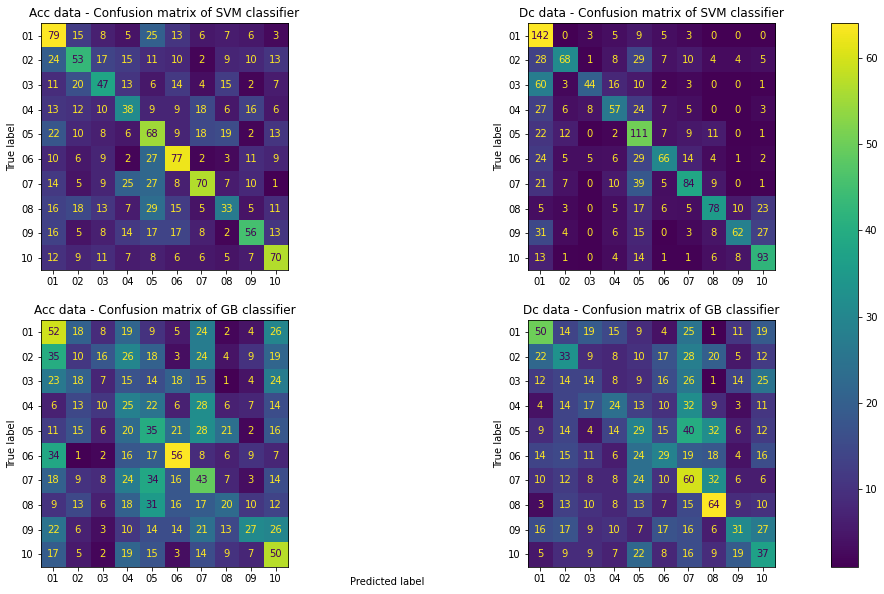

Best SVM classifier on acc data - F1 score: 0.3751314725602337
Best SVM classifier on dc data - F1 score: 0.5134618774700005

Best GB classifier on acc data - F1 score: 0.19915561148520217
Best GB classifier on dc data - F1 score: 0.23156232942072125

Confusion Matrix of combine Gb_acc + Svm_depth by fixed classification rules: prod, sum, max, min and F1 Score


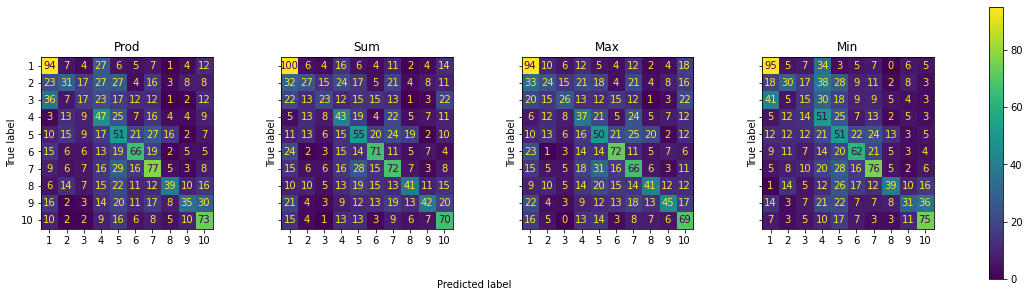


Prod - F1 Score:  0.32883282994214375

Sum - F1 Score:  0.33633400369096916

Max - F1 Score:  0.326078827834259

Min - F1 Score:  0.3281014460666663




In [25]:
# 5.2

### Your code begins here ###

# SVM - Train the classifiers for each modality on whole training dataset with the best parameters
# Svm - accelerometer
best_svm_clf_acc = SVC(C = 10.0, gamma = 2, kernel ='rbf',probability=True)
best_svm_clf_acc.fit(scaled_transform_train_acc, ytrain)
# Svm - depth images
best_svm_clf_dc = SVC(C = 10.0, gamma = 2, kernel ='rbf',probability=True)
best_svm_clf_dc.fit(scaled_transform_train_dc, ytrain)

# SVM - Predict probabilistic outputs of each trained classifier for both modalities using the test set.
# SVM - accelerometer
svm_pred_proba_acc = best_svm_clf_acc.predict_proba(scaled_transform_test_acc)
# SVM - depth images
svm_pred_proba_dc = best_svm_clf_dc.predict_proba(scaled_transform_test_dc)

# GB - Train the classifiers for each modality on whole training dataset with the best parameters
# GB - accelerometer
best_gb_clf_acc = GaussianNB(var_smoothing = 0.012328467394420659)
best_gb_clf_acc.fit(scaled_transform_train_acc, ytrain)
# GB - depth images
best_gb_clf_dc = GaussianNB(var_smoothing = 0.02310129700083159)
best_gb_clf_dc.fit(scaled_transform_train_dc, ytrain)

# GB - Predict probabilistic outputs of each trained classifier for both modalities using the test set.
# GB - accelerometer
gb_pred_proba_acc = best_gb_clf_acc.predict_proba(scaled_transform_test_acc)
# GB - depth images
gb_pred_proba_dc = best_gb_clf_dc.predict_proba(scaled_transform_test_dc)

##################################################################################################################
# Create confusion matrix for different classifier and sensor
cm = confusion_matrix(ytest, best_svm_clf_acc.predict(scaled_transform_test_acc), labels=person_ids)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=person_ids)
cm = confusion_matrix(ytest, best_svm_clf_dc.predict(scaled_transform_test_dc), labels=person_ids)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=person_ids)
cm = confusion_matrix(ytest, best_gb_clf_acc.predict(scaled_transform_test_acc), labels=person_ids)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=person_ids)
cm = confusion_matrix(ytest, best_gb_clf_dc.predict(scaled_transform_test_dc), labels=person_ids)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=person_ids)
# Plot confusion matrix 
disp = np.array([[disp1, disp2], [disp3, disp4]])
disp_names = np.array([['Acc data - Confusion matrix of SVM classifier', 'Dc data - Confusion matrix of SVM classifier'], 
                       ['Acc data - Confusion matrix of GB classifier', 'Dc data - Confusion matrix of GB classifier']])
f, axes = plt.subplots(2, 2, figsize=(20, 10))
for i in range(disp.shape[0]):
    for j in range(disp.shape[1]):
        disp[i,j].plot(ax=axes[i,j])
        disp[i,j].ax_.set_title(disp_names[i,j])
        disp[i,j].im_.colorbar.remove()
        disp[i,j].ax_.set_xlabel('')
f.text(0.45, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.2)
f.colorbar(disp[i,j].im_, ax=axes)
plt.show()
# Print F1 score
print('Best SVM classifier on acc data - F1 score:',f1_score(ytest, best_svm_clf_acc.predict(scaled_transform_test_acc),average ='macro'))
print('Best SVM classifier on dc data - F1 score:',f1_score(ytest, best_svm_clf_dc.predict(scaled_transform_test_dc),average ='macro'))
print('\nBest GB classifier on acc data - F1 score:',f1_score(ytest, best_gb_clf_acc.predict(scaled_transform_test_acc),average ='macro'))
print('Best GB classifier on dc data - F1 score:',f1_score(ytest, best_gb_clf_dc.predict(scaled_transform_test_dc),average ='macro'))

# Svm_acc + Gb_depth
print('\nConfusion Matrix of combine Gb_acc + Svm_depth by fixed classification rules: prod, sum, max, min and F1 Score')
combined(gb_pred_proba_acc, svm_pred_proba_dc, ytest, person_ids)

### Your code ends here ###

**5.2**</p>
**I use the same data (features) in task 5 but tried different model (Combined Gb_acc + Svm_depth) by fixed classification rules but the result is pretty bad, F1 score about 0.3.**</p>